In [2]:
import dask.dataframe as dd
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Load matrix file into a Dask DataFrame
matrix_path = '/Users/tanmaysagarhuria/Downloads/dask_df_normalized_output.csv'
dask_df = dd.read_csv(matrix_path, sample=4000000)  # Adjust the sample size if needed

In [4]:
metadata_path = '/Users/tanmaysagarhuria/Downloads/metadata (1).csv'
metadata = pd.read_csv(metadata_path)

In [5]:
print(dask_df.head())

   Unnamed: 0          sample_name  3.8-1.2  3.8-1.3  3.8-1.4  3.8-1.5  \
0           0  F2S4_160113_027_A01      0.0      0.0      0.0      0.0   
1           1  F2S4_160113_027_B01      0.0      0.0      0.0      0.0   
2           2  F2S4_160113_027_C01      0.0      0.0      0.0      0.0   
3           3  F2S4_160113_027_D01      0.0      0.0      0.0      0.0   
4           4  F2S4_160113_027_E01      0.0      0.0      0.0      0.0   

   5-HT3C2      A1BG  A1BG-AS1  A1CF  ...  ZXDB      ZXDC    ZYG11A  ZYG11AP1  \
0      0.0  0.000000       0.0   0.0  ...   0.0  5.645447  0.000000       0.0   
1      0.0  4.779123       0.0   0.0  ...   0.0  6.794587  0.000000       0.0   
2      0.0  0.000000       0.0   0.0  ...   0.0  0.000000  0.693147       0.0   
3      0.0  5.075174       0.0   0.0  ...   0.0  5.049856  0.693147       0.0   
4      0.0  0.693147       0.0   0.0  ...   0.0  2.708050  0.693147       0.0   

     ZYG11B      ZYX     ZZEF1      ZZZ3  bA255A11.4  bA395L14.12  


In [6]:
print(metadata.head())
print(metadata.columns)

           sample_name   exp_component_name specimen_type cluster_color  \
0  F2S4_160113_027_A01  LS-15005h_S01_E1-50       nucleus           NaN   
1  F2S4_160113_027_B01  LS-15005h_S02_E1-50       nucleus       #E170FE   
2  F2S4_160113_027_C01  LS-15005h_S03_E1-50       nucleus       #8E5864   
3  F2S4_160113_027_D01  LS-15005h_S04_E1-50       nucleus       #8B5862   
4  F2S4_160113_027_E01  LS-15005h_S05_E1-50       nucleus       #CF6EC9   

   cluster_order          cluster_label class_color  class_order class_label  \
0            NaN                    NaN         NaN          NaN         NaN   
1           32.0      Inh L2-5 VIP TOX2     #0066FF          4.0   GABAergic   
2            2.0     Inh L1 LAMP5 GGT8P     #0066FF          4.0   GABAergic   
3            1.0      Inh L1 LAMP5 NDNF     #0066FF          4.0   GABAergic   
4           34.0  Inh L1-3 VIP ZNF322P1     #0066FF          4.0   GABAergic   

  subclass_color  ...  cell_type_alt_alias_order cell_type_alt_alias

In [7]:
# Updated list of columns to keep
columns_to_keep = ['sample_name', 'subclass_label', 'region_label', 'cortical_layer_label', 'class_label']

# Drop all other columns
metadata_cleaned = metadata[columns_to_keep]

# Verify the cleaned metadata
print(metadata_cleaned.head())
print(metadata_cleaned.columns)

           sample_name subclass_label region_label cortical_layer_label  \
0  F2S4_160113_027_A01            NaN          MTG                   L1   
1  F2S4_160113_027_B01            VIP          MTG                   L1   
2  F2S4_160113_027_C01          LAMP5          MTG                   L1   
3  F2S4_160113_027_D01          LAMP5          MTG                   L1   
4  F2S4_160113_027_E01            VIP          MTG                   L1   

  class_label  
0         NaN  
1   GABAergic  
2   GABAergic  
3   GABAergic  
4   GABAergic  
Index(['sample_name', 'subclass_label', 'region_label', 'cortical_layer_label',
       'class_label'],
      dtype='object')


In [8]:
merged_df = dask_df.merge(metadata_cleaned, left_on='sample_name', right_on='sample_name')

In [9]:
print(merged_df.head())

   Unnamed: 0          sample_name  3.8-1.2  3.8-1.3  3.8-1.4  3.8-1.5  \
0           0  F2S4_160113_027_A01      0.0      0.0      0.0      0.0   
1           1  F2S4_160113_027_B01      0.0      0.0      0.0      0.0   
2           2  F2S4_160113_027_C01      0.0      0.0      0.0      0.0   
3           3  F2S4_160113_027_D01      0.0      0.0      0.0      0.0   
4           4  F2S4_160113_027_E01      0.0      0.0      0.0      0.0   

   5-HT3C2      A1BG  A1BG-AS1  A1CF  ...    ZYG11B      ZYX     ZZEF1  \
0      0.0  0.000000       0.0   0.0  ...  0.000000  3.73767  6.107023   
1      0.0  4.779123       0.0   0.0  ...  4.836282  0.00000  0.000000   
2      0.0  0.000000       0.0   0.0  ...  5.087596  0.00000  4.634729   
3      0.0  5.075174       0.0   0.0  ...  4.406719  0.00000  1.386294   
4      0.0  0.693147       0.0   0.0  ...  6.196444  0.00000  1.609438   

       ZZZ3  bA255A11.4  bA395L14.12  subclass_label  region_label  \
0  0.000000         0.0     0.693147    

In [10]:
# Drop rows with missing values in the target labels
merged_df_cleaned = merged_df.dropna(subset=['subclass_label', 'region_label', 'class_label'])

# Inspect the cleaned data
print(merged_df_cleaned.head())

   Unnamed: 0          sample_name  3.8-1.2  3.8-1.3  3.8-1.4  3.8-1.5  \
1           1  F2S4_160113_027_B01      0.0      0.0      0.0      0.0   
2           2  F2S4_160113_027_C01      0.0      0.0      0.0      0.0   
3           3  F2S4_160113_027_D01      0.0      0.0      0.0      0.0   
4           4  F2S4_160113_027_E01      0.0      0.0      0.0      0.0   
5           5  F2S4_160113_027_F01      0.0      0.0      0.0      0.0   

   5-HT3C2      A1BG  A1BG-AS1  A1CF  ...    ZYG11B  ZYX     ZZEF1      ZZZ3  \
1      0.0  4.779123       0.0   0.0  ...  4.836282  0.0  0.000000  6.618739   
2      0.0  0.000000       0.0   0.0  ...  5.087596  0.0  4.634729  0.000000   
3      0.0  5.075174       0.0   0.0  ...  4.406719  0.0  1.386294  0.693147   
4      0.0  0.693147       0.0   0.0  ...  6.196444  0.0  1.609438  3.526361   
5      0.0  2.397895       0.0   0.0  ...  1.609438  0.0  2.197225  5.799093   

   bA255A11.4  bA395L14.12  subclass_label  region_label  \
1         0.0 

In [11]:
# List of categorical columns to one-hot encode
categorical_columns = ['subclass_label', 'region_label', 'class_label']

# Convert the specified columns to categorical dtype
merged_df_cleaned[categorical_columns] = merged_df_cleaned[categorical_columns].categorize()

# Confirm that the columns have been categorized
print(merged_df_cleaned[categorical_columns].dtypes)

subclass_label    category
region_label      category
class_label       category
dtype: object


In [14]:
# Save Dask DataFrame as a single Parquet file
merged_df_cleaned.to_parquet('encoded_dataset.parquet', engine='pyarrow', compression='snappy', write_metadata_file=False)

In [15]:
import os

# Define the filename
filename = 'encoded_dataset.csv'  # Replace with your file name

# Get the full path of the file
file_path = os.path.join(os.getcwd(), filename)

# Check if the file exists and print the path
if os.path.exists(file_path):
    print(f"File is saved at: {file_path}")
else:
    print(f"File does not exist at: {file_path}")

File does not exist at: /Users/tanmaysagarhuria/encoded_dataset.csv


In [16]:
import os

# List all files in the current working directory
current_directory = os.getcwd()
files = os.listdir(current_directory)

# Print the list of files
print(f"Files in the current directory ({current_directory}): {files}")

Files in the current directory (/Users/tanmaysagarhuria): ['Untitled Folder', 'dsmp-2024-group15-main', 'Untitled10.ipynb', '.Rhistory', 'Untitled7.ipynb', 'worksheet1 (2).ipynb', 'EDA.ipynb', '.config', 'Music', 'Dopamine.ipynb', 'Serotinin.ipynb', 'LSTM-Implementation.ipynb', 'mnist_reader.py', 'TextAnalysis.ipynb', 'hvg_normalized_output.csv', '.condarc', 'data_cache', 'TA-Task2-Redo copy.ipynb', 'Untitled12.ipynb', 'Untitled5.ipynb', 'your_config.ini', 'Untitled1.ipynb', 'Untitled16.ipynb', '.DS_Store', 'nltk_data', 'Household composition, local authorities in England and Wales.xlsx', 'trainHistoryDict.pkl', 'LOB-Cleaned.ipynb', 'LSTM.ipynb', '.CFUserTextEncoding', 'combined_df 5.csv', '.xonshrc', 'Serotinin-new.ipynb', 'combined_df 4.csv', 'Untitled3.ipynb', 'learnerlab-keypair.pem', 'Untitled14.ipynb', 'worksheet2.ipynb', 'model_with_pos.crf.tagger', 'mnist_reader(1).py', 'Untitled.ipynb', '.zshrc', 'Out_21.xlsx', 'best_model.keras', 'mapper.py', '4_NN_classifiers_and_embedding_s

In [18]:
# Save the DataFrame to a single CSV file using Dask
merged_df_cleaned.to_csv('merged_df_cleaned.csv', single_file=True)

print("File saved successfully!")

File saved successfully!


In [19]:
# Perform one-hot encoding on the categorical columns
encoded_df_dask = dd.get_dummies(merged_df_cleaned, columns=categorical_columns)

# Trigger the computation and display the first few rows
encoded_df_dask = encoded_df_dask.compute()
print(encoded_df_dask.head())

   Unnamed: 0          sample_name  3.8-1.2  3.8-1.3  3.8-1.4  3.8-1.5  \
1           1  F2S4_160113_027_B01      0.0      0.0      0.0      0.0   
2           2  F2S4_160113_027_C01      0.0      0.0      0.0      0.0   
3           3  F2S4_160113_027_D01      0.0      0.0      0.0      0.0   
4           4  F2S4_160113_027_E01      0.0      0.0      0.0      0.0   
5           5  F2S4_160113_027_F01      0.0      0.0      0.0      0.0   

   5-HT3C2      A1BG  A1BG-AS1  A1CF  ...  region_label_CgG  \
1      0.0  4.779123       0.0   0.0  ...             False   
2      0.0  0.000000       0.0   0.0  ...             False   
3      0.0  5.075174       0.0   0.0  ...             False   
4      0.0  0.693147       0.0   0.0  ...             False   
5      0.0  2.397895       0.0   0.0  ...             False   

   region_label_M1lm  region_label_M1ul  region_label_MTG  region_label_S1lm  \
1              False              False              True              False   
2              F

In [20]:
# Save the encoded DataFrame to a CSV file
encoded_df_dask.to_csv('encoded_data.csv', index=False)

# Provide confirmation of file save
print("Encoded DataFrame saved as 'encoded_data.csv'.")

Encoded DataFrame saved as 'encoded_data.csv'.


In [21]:
import os

# List all files in the current working directory
current_directory = os.getcwd()
files = os.listdir(current_directory)

# Print the list of files
print(f"Files in the current directory ({current_directory}): {files}")

Files in the current directory (/Users/tanmaysagarhuria): ['Untitled Folder', 'dsmp-2024-group15-main', 'Untitled10.ipynb', '.Rhistory', 'Untitled7.ipynb', 'worksheet1 (2).ipynb', 'EDA.ipynb', '.config', 'Music', 'Dopamine.ipynb', 'Serotinin.ipynb', 'LSTM-Implementation.ipynb', 'mnist_reader.py', 'TextAnalysis.ipynb', 'hvg_normalized_output.csv', '.condarc', 'data_cache', 'TA-Task2-Redo copy.ipynb', 'Untitled12.ipynb', 'Untitled5.ipynb', 'your_config.ini', 'Untitled1.ipynb', 'Untitled16.ipynb', '.DS_Store', 'nltk_data', 'Household composition, local authorities in England and Wales.xlsx', 'trainHistoryDict.pkl', 'LOB-Cleaned.ipynb', 'encoded_data.csv', 'LSTM.ipynb', '.CFUserTextEncoding', 'combined_df 5.csv', '.xonshrc', 'Serotinin-new.ipynb', 'combined_df 4.csv', 'Untitled3.ipynb', 'learnerlab-keypair.pem', 'Untitled14.ipynb', 'worksheet2.ipynb', 'model_with_pos.crf.tagger', 'mnist_reader(1).py', 'merged_df_cleaned.csv', 'Untitled.ipynb', '.zshrc', 'Out_21.xlsx', 'best_model.keras', '

In [12]:
# Define the feature columns (all columns except the labels)
feature_columns = [col for col in encoded_df_dask.columns if col not in ['subclass_label', 'region_label', 'class_label']]

# Separate the features and labels
X = encoded_df_dask[feature_columns]
y_subclass = encoded_df_dask[[col for col in encoded_df_dask.columns if 'subclass_label_' in col]]
y_region = encoded_df_dask[[col for col in encoded_df_dask.columns if 'region_label_' in col]]
y_class = encoded_df_dask[[col for col in encoded_df_dask.columns if 'class_label_' in col]]

# Display the shapes to verify
print(X.shape, y_subclass.shape, y_region.shape, y_class.shape)

(47432, 50314) (47432, 19) (47432, 8) (47432, 22)


In [24]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

In [13]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train_subclass, y_test_subclass = train_test_split(X, y_subclass, test_size=0.2, random_state=42)
_, _, y_train_region, y_test_region = train_test_split(X, y_region, test_size=0.2, random_state=42)
_, _, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.2, random_state=42)

# Display the shapes to verify
print(X_train.shape, X_test.shape, y_train_subclass.shape, y_test_subclass.shape)
print(y_train_region.shape, y_test_region.shape, y_train_class.shape, y_test_class.shape)

(37945, 50314) (9487, 50314) (37945, 19) (9487, 19)
(37945, 8) (9487, 8) (37945, 22) (9487, 22)


In [26]:
# Select only numeric columns
numeric_df = encoded_df_dask.select_dtypes(include=[np.number])

In [28]:
# Apply log normalization using DataFrame.map instead of applymap
log_normalized_df = numeric_df.map(lambda x: np.log2(x + 1))

In [29]:
from sklearn.decomposition import PCA

# Apply PCA to reduce the dimensionality
pca = PCA(n_components=50)  # Start with 50 components or adjust based on variance explained
X_reduced = pca.fit_transform(log_normalized_df)

In [31]:
y_labels = encoded_df_dask.filter(like='subclass_label').values  # Assuming you want to predict subclass labels

In [34]:
from sklearn.model_selection import train_test_split

# Assuming you want to predict subclass labels
y_labels = encoded_df_dask.filter(like='subclass_label').values
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y_labels, test_size=0.2, random_state=42)

In [35]:
# Import the necessary libraries for Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Random Forest model for subclass label prediction
rf_model_subclass = RandomForestClassifier(n_estimators=100, random_state=42)

In [36]:
# Train the model
rf_model_subclass.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [37]:
# Predict on the test set
y_pred_subclass = rf_model_subclass.predict(X_test)

In [38]:
# Evaluate the model
accuracy_subclass = accuracy_score(y_test, y_pred_subclass)
print(f'Subclass Label Prediction Accuracy: {accuracy_subclass}')
print('Classification Report for Subclass Labels:')
print(classification_report(y_test, y_pred_subclass))

Subclass Label Prediction Accuracy: 0.9730157057025404
Classification Report for Subclass Labels:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       225
           1       1.00      1.00      1.00        13
           2       0.98      0.99      0.99      4360
           3       0.98      0.85      0.91       752
           4       1.00      0.61      0.76        31
           5       1.00      0.99      0.99       211
           6       1.00      0.96      0.98       163
           7       0.99      0.97      0.98       537
           8       0.98      0.94      0.96       202
           9       1.00      0.97      0.99       478
          10       1.00      1.00      1.00       148
          11       1.00      0.99      0.99       160
          12       1.00      0.99      1.00       366
          13       0.98      0.93      0.95        67
          14       0.98      0.98      0.98       566
          15       1.00      0.22    

/Users/tanmaysagarhuria/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/tanmaysagarhuria/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/tanmaysagarhuria/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()}

In [42]:
import joblib

# Save the trained Random Forest model to a file
model_filename = 'random_forest_subclass_model.pkl'
joblib.dump(rf_model_subclass, model_filename)

print(f"Model saved to {model_filename}")

Model saved to random_forest_subclass_model.pkl


In [43]:
import os

# Get the current working directory
current_directory = os.getcwd()

# List all files in the current working directory
files_in_directory = os.listdir(current_directory)

# Print the current directory and the list of files
print(f"Current working directory: {current_directory}")
print("Files in the current directory:")
for file in files_in_directory:
    print(file)

Current working directory: /Users/tanmaysagarhuria
Files in the current directory:
Untitled Folder
dsmp-2024-group15-main
Untitled10.ipynb
.Rhistory
Untitled7.ipynb
worksheet1 (2).ipynb
EDA.ipynb
.config
Music
Dopamine.ipynb
Serotinin.ipynb
LSTM-Implementation.ipynb
mnist_reader.py
TextAnalysis.ipynb
hvg_normalized_output.csv
.condarc
data_cache
TA-Task2-Redo copy.ipynb
Untitled12.ipynb
Untitled5.ipynb
your_config.ini
Untitled1.ipynb
Untitled16.ipynb
.DS_Store
nltk_data
Household composition, local authorities in England and Wales.xlsx
trainHistoryDict.pkl
LOB-Cleaned.ipynb
encoded_data.csv
LSTM.ipynb
.CFUserTextEncoding
combined_df 5.csv
.xonshrc
Serotinin-new.ipynb
combined_df 4.csv
Untitled3.ipynb
learnerlab-keypair.pem
Untitled14.ipynb
worksheet2.ipynb
model_with_pos.crf.tagger
mnist_reader(1).py
merged_df_cleaned.csv
Untitled.ipynb
.zshrc
Out_21.xlsx
best_model.keras
mapper.py
4_NN_classifiers_and_embedding_solutions.ipynb
dopamine_meta_merged_repartitioned.parquet
train_dataset.c

In [44]:
import os

# Define the filename
filename = "random_forest_subclass_model.pkl"

# Get the current working directory
current_directory = os.getcwd()

# Construct the full file path
file_path = os.path.join(current_directory, filename)

# Check if the file exists at the specified path
if os.path.exists(file_path):
    print(f"File exists at: {file_path}")
else:
    print(f"File does not exist at: {file_path}")

File exists at: /Users/tanmaysagarhuria/random_forest_subclass_model.pkl


In [39]:
# If you want to repeat the process for region and class labels, you can re-define y_labels and split the data again.
# For region labels:
y_labels_region = encoded_df_dask.filter(like='region_label').values
X_train_region, X_test_region, y_train_region, y_test_region = train_test_split(X_reduced, y_labels_region, test_size=0.2, random_state=42)

# Train and evaluate the model for region labels
rf_model_region = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_region.fit(X_train_region, y_train_region)
y_pred_region = rf_model_region.predict(X_test_region)
accuracy_region = accuracy_score(y_test_region, y_pred_region)
print(f'Region Label Prediction Accuracy: {accuracy_region}')
print('Classification Report for Region Labels:')
print(classification_report(y_test_region, y_pred_region))


Region Label Prediction Accuracy: 0.44039211552651
Classification Report for Region Labels:
              precision    recall  f1-score   support

           0       0.94      0.11      0.20      1336
           1       0.97      0.38      0.55      1202
           2       0.94      0.09      0.17       653
           3       0.96      0.04      0.08       541
           4       0.91      0.78      0.84      3059
           5       0.83      0.01      0.02       521
           6       1.00      0.01      0.03       631
           7       0.98      0.70      0.82      1544

   micro avg       0.94      0.44      0.60      9487
   macro avg       0.94      0.27      0.34      9487
weighted avg       0.94      0.44      0.52      9487
 samples avg       0.44      0.44      0.44      9487



/Users/tanmaysagarhuria/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [45]:
import joblib

# Save the trained Random Forest model to a file
model_filename = 'random_forest_Region_model.pkl'
joblib.dump(rf_model_subclass, model_filename)

print(f"Model saved to {model_filename}")

Model saved to random_forest_Region_model.pkl


In [40]:
# For class labels:
y_labels_class = encoded_df_dask.filter(like='class_label').values
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_reduced, y_labels_class, test_size=0.2, random_state=42)

# Train and evaluate the model for class labels
rf_model_class = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_class.fit(X_train_class, y_train_class)
y_pred_class = rf_model_class.predict(X_test_class)
accuracy_class = accuracy_score(y_test_class, y_pred_class)
print(f'Class Label Prediction Accuracy: {accuracy_class}')
print('Classification Report for Class Labels:')
print(classification_report(y_test_class, y_pred_class))

Class Label Prediction Accuracy: 0.9733319279013387
Classification Report for Class Labels:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       225
           1       0.93      1.00      0.96        13
           2       0.98      0.99      0.99      4360
           3       0.98      0.85      0.91       752
           4       1.00      0.61      0.76        31
           5       1.00      0.97      0.98       211
           6       1.00      0.96      0.98       163
           7       0.99      0.98      0.99       537
           8       0.98      0.95      0.96       202
           9       1.00      0.98      0.99       478
          10       1.00      1.00      1.00       148
          11       1.00      0.99      0.99       160
          12       1.00      0.99      0.99       366
          13       0.98      0.91      0.95        67
          14       0.98      0.98      0.98       566
          15       1.00      0.11      0.20

/Users/tanmaysagarhuria/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/tanmaysagarhuria/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/tanmaysagarhuria/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()}

In [46]:
import joblib

# Save the trained Random Forest model to a file
model_filename = 'random_forest_class_label.pkl'
joblib.dump(rf_model_subclass, model_filename)

print(f"Model saved to {model_filename}")

Model saved to random_forest_class_label.pkl


In [49]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Adjust the eps parameter to see if you can get more than one cluster
dbscan = DBSCAN(eps=1.0, min_samples=5)  # Increase eps from 0.5 to 1.0
dbscan_labels = dbscan.fit_predict(X_reduced)

# Evaluate clustering with silhouette score if multiple clusters are formed
if len(set(dbscan_labels)) > 1:
    silhouette_avg = silhouette_score(X_reduced, dbscan_labels)
    print(f"DBSCAN Silhouette Score: {silhouette_avg}")
else:
    print("DBSCAN could not form more than one cluster. Try adjusting parameters.")

DBSCAN could not form more than one cluster. Try adjusting parameters.


In [50]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Trying different eps and min_samples values
eps_values = [0.5, 1.0, 2.0, 5.0]  # Different values for eps
min_samples_values = [3, 5, 10]  # Different values for min_samples

In [52]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Trying different eps and min_samples values
eps_values = [0.5, 1.0, 2.0, 5.0]  # Different values for eps
min_samples_values = [3, 5, 10]  # Different values for min_samples

best_silhouette = -1
best_eps = None
best_min_samples = None
best_labels = None

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X_reduced)
        
        # We only calculate silhouette score if more than 1 cluster is found
        if len(set(labels)) > 1:
            silhouette_avg = silhouette_score(X_reduced, labels)
            print(f"DBSCAN with eps={eps}, min_samples={min_samples}, Silhouette Score={silhouette_avg}")
            
            if silhouette_avg > best_silhouette:
                best_silhouette = silhouette_avg
                best_eps = eps
                best_min_samples = min_samples
                best_labels = labels

print(f"\nBest DBSCAN Silhouette Score: {best_silhouette} with eps={best_eps} and min_samples={best_min_samples}")


Best DBSCAN Silhouette Score: -1 with eps=None and min_samples=None


In [53]:
import scanpy as sc
import anndata
import numpy as np
import pandas as pd

# Assuming X_reduced is your dimensionality-reduced data

# Convert your data into an AnnData object (required by scanpy)
adata = anndata.AnnData(X_reduced)

In [54]:
# Compute the neighborhood graph
sc.pp.neighbors(adata, n_neighbors=15, use_rep='X')  # You can adjust n_neighbors

In [55]:
# Apply Louvain clustering
sc.tl.louvain(adata, resolution=1.0)  # Adjust resolution to control the number of clusters

# Extract the Louvain labels
louvain_labels = adata.obs['louvain'].astype(int)

In [56]:
# Add Louvain labels back to your DataFrame for further analysis
encoded_df_dask['louvain_labels'] = louvain_labels

# Display the first few rows to confirm the labels
print(encoded_df_dask.head())

   Unnamed: 0          sample_name  3.8-1.2  3.8-1.3  3.8-1.4  3.8-1.5  \
1           1  F2S4_160113_027_B01      0.0      0.0      0.0      0.0   
2           2  F2S4_160113_027_C01      0.0      0.0      0.0      0.0   
3           3  F2S4_160113_027_D01      0.0      0.0      0.0      0.0   
4           4  F2S4_160113_027_E01      0.0      0.0      0.0      0.0   
5           5  F2S4_160113_027_F01      0.0      0.0      0.0      0.0   

   5-HT3C2      A1BG  A1BG-AS1  A1CF  ...  region_label_M1lm  \
1      0.0  4.779123       0.0   0.0  ...              False   
2      0.0  0.000000       0.0   0.0  ...              False   
3      0.0  5.075174       0.0   0.0  ...              False   
4      0.0  0.693147       0.0   0.0  ...              False   
5      0.0  2.397895       0.0   0.0  ...              False   

   region_label_M1ul  region_label_MTG  region_label_S1lm  region_label_S1ul  \
1              False              True              False              False   
2         

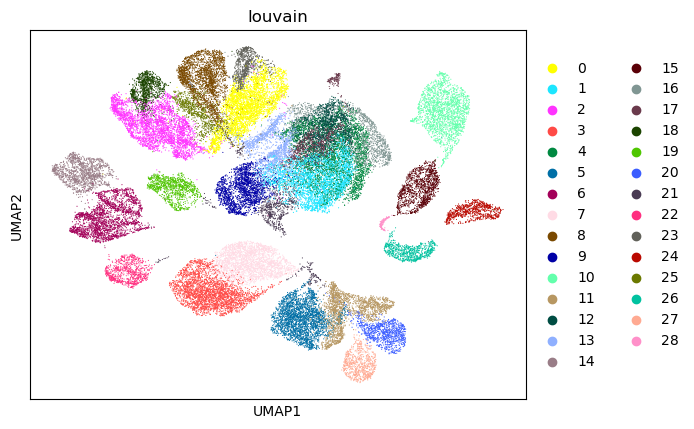

In [57]:
import scanpy as sc
import matplotlib.pyplot as plt

# Assuming `adata` already contains your reduced data and Louvain clusters

# Compute UMAP embedding
sc.tl.umap(adata)

# Plot the UMAP, colored by Louvain clusters
sc.pl.umap(adata, color='louvain')


In [58]:
plt.savefig('louvain_umap.png', dpi=300)

<Figure size 640x480 with 0 Axes>

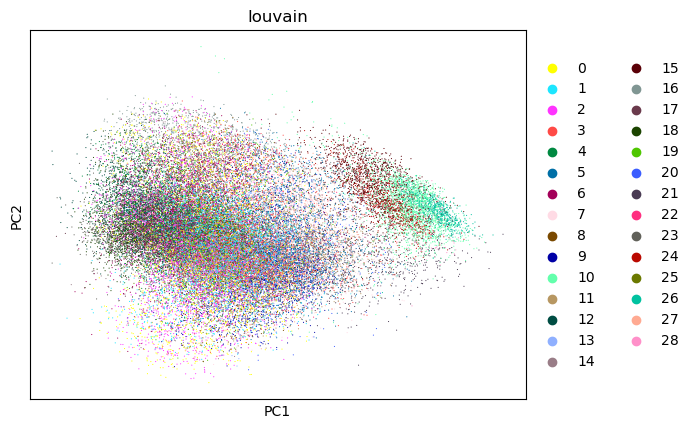

In [59]:
# Compute PCA (already done if you've used PCA for dimensionality reduction)
sc.tl.pca(adata)

# Plot PCA
sc.pl.pca(adata, color='louvain')

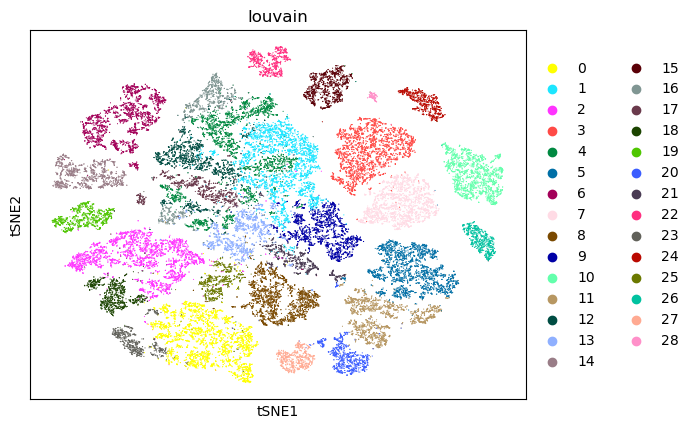

In [60]:
# Compute t-SNE
sc.tl.tsne(adata)

# Plot t-SNE
sc.pl.tsne(adata, color='louvain')

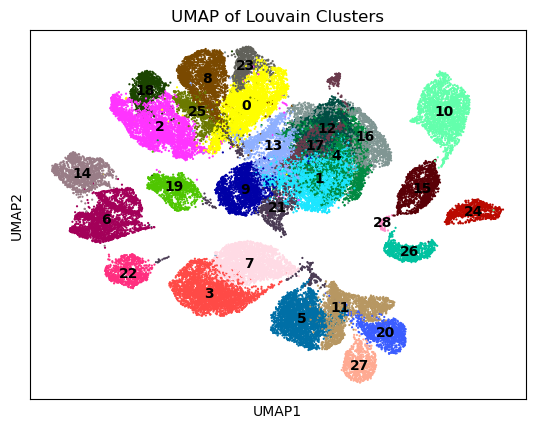

In [61]:
sc.pl.umap(adata, color='louvain', size=10, legend_loc='on data', title='UMAP of Louvain Clusters', use_raw=False)

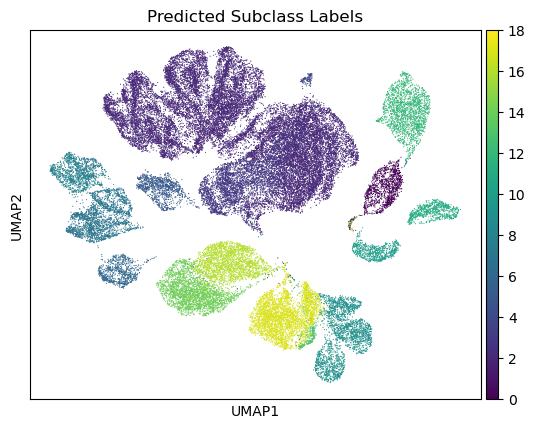

In [64]:
import numpy as np

# Convert predicted probabilities to class labels
y_pred_subclass = np.argmax(y_pred_subclass, axis=1)

# Ensure the predicted labels are a 1D array
if len(y_pred_subclass.shape) > 1:
    y_pred_subclass = y_pred_subclass.flatten()

# Add predictions to the AnnData object for visualization
adata.obs['predicted_subclass'] = y_pred_subclass

# Now plot the UMAP with the predicted subclass labels
sc.pl.umap(adata, color='predicted_subclass', title='Predicted Subclass Labels')

In [68]:
print(f"Length of y_test: {len(y_test)}")
print(f"Length of y_pred_subclass: {len(y_pred_subclass)}")

Length of y_test: 180253
Length of y_pred_subclass: 47432


In [69]:
y_test_filtered = y_test[:len(y_pred_subclass)]

# Now, create the DataFrame again
comparison_df = pd.DataFrame({
    'True Label': y_test_filtered,
    'Predicted Label': y_pred_subclass
})

# Display the first few rows to inspect
print(comparison_df.head())

   True Label  Predicted Label
0       False               17
1       False                9
2       False                9
3       False               17
4       False               17


In [70]:
print(np.unique(y_test_filtered))  # Should show the unique subclass labels
print(np.unique(y_pred_subclass))  # Should show the same unique subclass labels

[False  True]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]


In [14]:
# Identify non-numeric columns
non_numeric_columns = X.columns[X.dtypes == 'object']

# Remove non-numeric columns from the features
X_numeric = X.drop(non_numeric_columns, axis=1)

# Verify that the remaining columns are numeric
print(X_numeric.dtypes)

Unnamed: 0                     int64
3.8-1.2                      float64
3.8-1.3                      float64
3.8-1.4                      float64
3.8-1.5                      float64
                              ...   
region_label_S1ul               bool
region_label_V1C                bool
class_label_GABAergic           bool
class_label_Glutamatergic       bool
class_label_Non-neuronal        bool
Length: 50313, dtype: object


In [15]:
#import pandas as pd
from sklearn.preprocessing import StandardScaler

In [ ]:
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the numeric training data and transform both the training and testing data
X_train_scaled = scaler.fit_transform(X_train[X_numeric.columns])
X_test_scaled = scaler.transform(X_test[X_numeric.columns])

# Convert the scaled data back into DataFrames with appropriate column names
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_numeric.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_numeric.columns)

# Verify the shapes
print(X_train_scaled_df.shape, X_test_scaled_df.shape)

In [ ]:
relevant_genes = ['HTR2A', 'HTR1A', 'SLC6A4', 'TPH1', 'TPH2', 'MAOA',
                  'DRD1', 'DRD2', 'SLC6A3', 'TH', 'COMT', 'MAOB',
                  'CHRNA4', 'CHRM2', 'ACHE', 'CHAT', 'SLC18A3']

In [ ]:
filtered_df = merged_df_cleaned[relevant_genes + ['subclass_label', 'region_label', 'class_label']]

In [ ]:
print(filtered_df.head())

In [ ]:
filtered_df.to_csv('filtered_neurotransmitter_genes.csv', index=False)

In [ ]:
import dask.dataframe as dd

# List of categorical columns to one-hot encode
categorical_columns = ['sample_name', 'subclass_label', 'region_label', 'class_label']

In [ ]:
print(filtered_df.columns)

In [ ]:
import dask.dataframe as dd

# List of categorical columns to one-hot encode
categorical_columns = ['subclass_label', 'region_label', 'class_label']

# Convert the specified columns to categorical dtype
filtered_df = filtered_df.categorize(columns=categorical_columns)


In [ ]:
filtered_df_encoded = dd.get_dummies(filtered_df, columns=categorical_columns)

In [ ]:
sample = filtered_df_encoded.head()
print(sample)

In [ ]:
from sklearn.model_selection import train_test_split

# Separate features and target variables
X = filtered_df_encoded.drop(['region_label_CgG', 'region_label_M1lm', 'region_label_M1ul', 
                              'region_label_MTG', 'region_label_S1lm', 'region_label_S1ul', 
                              'region_label_V1C', 'class_label_GABAergic', 'class_label_Glutamatergic',
                              'class_label_Non-neuronal', 'subclass_label_VIP', 'subclass_label_LAMP5'], axis=1)

y_region = filtered_df_encoded[[col for col in filtered_df_encoded.columns if col.startswith('region_label_')]]
y_subclass = filtered_df_encoded[[col for col in filtered_df_encoded.columns if col.startswith('subclass_label_')]]
y_class = filtered_df_encoded[[col for col in filtered_df_encoded.columns if col.startswith('class_label_')]]


In [ ]:
# Convert Dask DataFrame to Pandas DataFrame
X_pd = X.compute()
y_region_pd = y_region.compute()
y_subclass_pd = y_subclass.compute()
y_class_pd = y_class.compute()

# Now use train_test_split from scikit-learn
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train_region, y_test_region = train_test_split(X_pd, y_region_pd, test_size=0.2, random_state=42)
_, _, y_train_subclass, y_test_subclass = train_test_split(X_pd, y_subclass_pd, test_size=0.2, random_state=42)
_, _, y_train_class, y_test_class = train_test_split(X_pd, y_class_pd, test_size=0.2, random_state=42)

# Verify the shapes
print(X_train.shape, X_test.shape, y_train_region.shape, y_test_region.shape)
print(y_train_subclass.shape, y_test_subclass.shape)
print(y_train_class.shape, y_test_class.shape)

In [ ]:
# Import necessary library
import pandas as pd

# Convert the Dask DataFrame to Pandas DataFrame if not already done
# X_train, X_test, y_train_region, y_test_region, y_train_subclass, y_test_subclass, y_train_class, y_test_class

# Concatenate features and target labels for both train and test datasets
train_df = pd.concat([X_train, y_train_region, y_train_subclass, y_train_class], axis=1)
test_df = pd.concat([X_test, y_test_region, y_test_subclass, y_test_class], axis=1)

# Save the train and test datasets to CSV files
train_df.to_csv('train_dataset.csv', index=False)
test_df.to_csv('test_dataset.csv', index=False)

# Provide confirmation of file save
print("Train and test datasets saved as 'train_dataset.csv' and 'test_dataset.csv'.")

In [ ]:
import os

# Print the current working directory
print(os.getcwd())

In [ ]:
import os

# Get the current working directory
current_directory = os.getcwd()

# Combine the directory with the file names to get the full paths
train_file_path = os.path.join(current_directory, 'train_dataset.csv')
test_file_path = os.path.join(current_directory, 'test_dataset.csv')

# Print the paths
print(f"Train dataset saved at: {train_file_path}")
print(f"Test dataset saved at: {test_file_path}")

In [ ]:
pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout

In [ ]:
pip install scvi-tools

In [ ]:
pip install jupyter matplotlib seaborn

In [ ]:
import scvi
import anndata
import scanpy as sc

In [ ]:
import anndata
import numpy as np

# Combine features and labels for training data
train_data = np.hstack((X_train, y_train_region, y_train_subclass, y_train_class))
train_adata = anndata.AnnData(X_train)

# Combine features and labels for testing data
test_data = np.hstack((X_test, y_test_region, y_test_subclass, y_test_class))
test_adata = anndata.AnnData(X_test)

In [ ]:
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)

train_adata = anndata.AnnData(X_train)
test_adata = anndata.AnnData(X_test)

In [ ]:
X_train.index = X_train.index.astype(str)
X_test.index = X_test.index.astype(str)

In [ ]:
import anndata
import numpy as np
import scvi

# Ensure data is in correct numerical format
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)

# Convert training and testing data to AnnData
train_adata = anndata.AnnData(X_train)
test_adata = anndata.AnnData(X_test)

# Make observation names unique
train_adata.obs_names_make_unique()
test_adata.obs_names_make_unique()


In [ ]:
# Setup AnnData for scVI
scvi.model.SCVI.setup_anndata(train_adata)


In [ ]:
pip install tensorflow scikit-learn

In [ ]:
print(train_df.head())
print(train_df.columns)

In [ ]:
# Features: First 17 columns
X_train = train_df.iloc[:, :17]

# Subclass Labels: Next 29 columns
y_train_subclass = train_df.iloc[:, 17:46]

# Region Labels: Next 9 columns
y_train_region = train_df.iloc[:, 46:55]

# Class Labels: Last 3 columns
y_train_class = train_df.iloc[:, 55:65]

# Display the shapes to verify
print(X_train.shape, y_train_subclass.shape, y_train_region.shape, y_train_class.shape)

In [ ]:
# Features: First 17 columns
X_test = test_df.iloc[:, :17]

# Subclass Labels: Next 29 columns
y_test_subclass = test_df.iloc[:, 17:46]

# Region Labels: Next 9 columns
y_test_region = test_df.iloc[:, 46:55]

# Class Labels: Last 3 columns
y_test_class = test_df.iloc[:, 55:65]

# Display the shapes to verify
print(X_test.shape, y_test_subclass.shape, y_test_region.shape, y_test_class.shape)

In [ ]:
# Reshape input for LSTM (samples, time steps, features)
X_train_lstm = X_train.values.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_lstm = X_test.values.reshape(X_test.shape[0], 1, X_test.shape[1])

In [ ]:
print(X_train_lstm.shape, X_test_lstm.shape)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


In [ ]:
from tensorflow.keras import Input

# Define the input layer with the specified shape
input_layer = Input(shape=(1, X_train.shape[1]))

# Define the LSTM-based model
x = LSTM(128, return_sequences=True)(input_layer)
x = Dropout(0.3)(x)
x = LSTM(64, return_sequences=False)(x)
x = Dropout(0.3)(x)
x = Dense(64, activation='relu')(x)


In [ ]:
# Define separate outputs for each target
output_region = Dense(y_train_region.shape[1], activation='softmax', name='region_output')(x)
output_subclass = Dense(y_train_subclass.shape[1], activation='softmax', name='subclass_output')(x)
output_class = Dense(y_train_class.shape[1], activation='softmax', name='class_output')(x)


In [ ]:
# Combine the inputs and outputs into a model
model = tf.keras.Model(inputs=input_layer, outputs=[output_region, output_subclass, output_class])


In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss={'region_output': 'categorical_crossentropy',
                    'subclass_output': 'categorical_crossentropy',
                    'class_output': 'categorical_crossentropy'},
              metrics=['accuracy'])

In [ ]:
# Print the model summary to review the architecture
model.summary()

In [ ]:
# Compile the model with separate metrics for each output
model.compile(optimizer='adam',
              loss={'region_output': 'categorical_crossentropy',
                    'subclass_output': 'categorical_crossentropy',
                    'class_output': 'categorical_crossentropy'},
              metrics={'region_output': 'accuracy',
                       'subclass_output': 'accuracy',
                       'class_output': 'accuracy'})

In [ ]:
# Train the model
history = model.fit(X_train_lstm, 
                    {'region_output': y_train_region,
                     'subclass_output': y_train_subclass,
                     'class_output': y_train_class},
                    epochs=50,         # Start with 50 epochs
                    batch_size=64,      # Start with a batch size of 64
                    validation_split=0.2,  # Use 20% of training data for validation
                    callbacks=[
                        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
                    ])

NameError: name 'DBSCAN' is not defined